<a href="https://colab.research.google.com/github/Aryan-Gupta2002/Deep-Learning---Tensorflow/blob/main/CNN_classification_fineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Covulational Layer Architecture**
------------------------------------

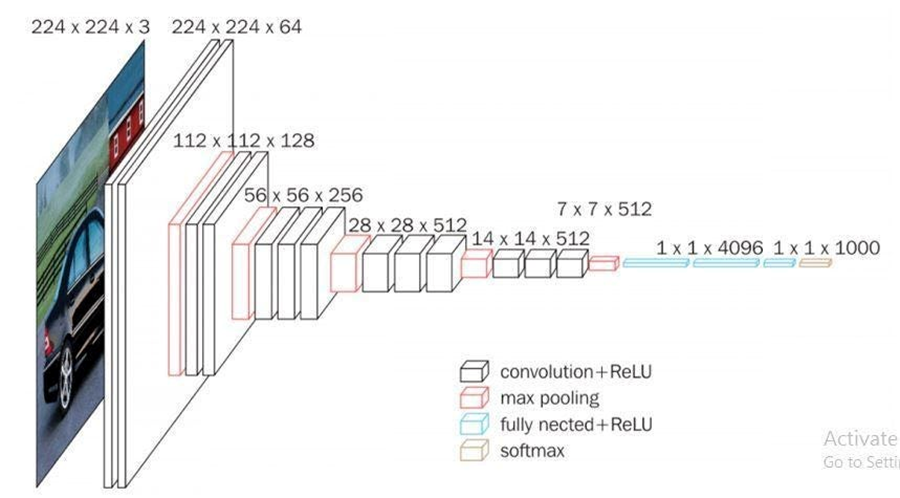

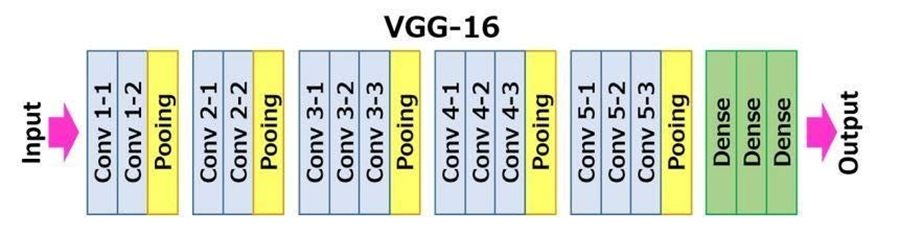

###Note:The model will overfit as we are using a pretrained VGG-16 model and the dataset size is too small.

### Feature extraction Implementation using Tensorflow  
Procedure  
1.	Loading a pre-trained CNN model with ImageNet weights   
2.	Freeze all convolutional layers  


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/CNN dataset DL lab furniture",
    image_size=(224, 224),
    batch_size=8
)

class_names = train_ds.class_names
num_classes = len(class_names)

train_ds = train_ds.map(lambda x, y: (x / 255.0, y))


base_model = tf.keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3) )
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(train_ds, epochs=5)


Found 30 files belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4150 - loss: 4.3291
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5767 - loss: 1.5740
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9517 - loss: 0.1417
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.0193
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 9.2381e-04


###Fine Tuning implementation using Tensorflow   
Procedure  
1.	Start with the feature extraction model  
2.	Unfreeze the top convolutional layers  
3.	Train the model with a smaller learning rate  
4.	Observe how training behavior changes  


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/CNN dataset DL lab furniture",
    image_size=(224, 224),
    batch_size=8
)

class_names = train_ds.class_names
num_classes = len(class_names)

train_ds = train_ds.map(lambda x, y: (x / 255.0, y))

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
])
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


model.fit(train_ds, epochs=5)


Found 30 files belonging to 3 classes.
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 813ms/step - accuracy: 0.4617 - loss: 1.1299
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9317 - loss: 0.3236
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9408 - loss: 0.0739
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.0059
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.0041


###Feature extraction Implementation using Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(
    root="/content/drive/MyDrive/Colab Notebooks/CNN dataset DL lab furniture",
    transform=transform
)

dataloader = DataLoader(dataset, batch_size=8, shuffle=True)
num_classes = 3

model = models.vgg16(weights="IMAGENET1K_V1")

for param in model.features.parameters(): # freezes the convolution block
    param.requires_grad = False

model.classifier = nn.Sequential(
    nn.Linear(25088, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}")


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:05<00:00, 94.5MB/s]


Epoch 1, Loss: 4.0665
Epoch 2, Loss: 0.8096
Epoch 3, Loss: 0.0049
Epoch 4, Loss: 0.0003
Epoch 5, Loss: 0.0000


###Fine Tuning implementation using Pytorch


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(
    root="/content/drive/MyDrive/Colab Notebooks/CNN dataset DL lab furniture",
    transform=transform
)

dataloader = DataLoader(
    dataset,
    batch_size=8,
    shuffle=True
)

num_classes = len(dataset.classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = models.vgg16(weights="IMAGENET1K_V1")

for param in model.features.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(
    nn.Linear(25088, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, num_classes)
)

model.to(device)

# Unfreeze Conv Block 5
for param in model.features[24:].parameters():
    param.requires_grad = True

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=0.0001
)

epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in dataloader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1} | Loss: {running_loss:.4f} | Accuracy: {accuracy:.2f}%")


Using device: cuda
Epoch 1 | Loss: 3.7457 | Accuracy: 56.67%
Epoch 2 | Loss: 0.6386 | Accuracy: 100.00%
Epoch 3 | Loss: 0.0346 | Accuracy: 100.00%
Epoch 4 | Loss: 0.0111 | Accuracy: 100.00%
Epoch 5 | Loss: 0.0002 | Accuracy: 100.00%
